# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alex/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment vari 
from newsapi import NewsApiClient 
load_dotenv('/Users/alex/Desktop/newsapi.env')
api_key = os.getenv('news_api')
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q = 'bitcoin',
    language = 'en',
    sort_by = 'relevancy',
    page_size = 100
)

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q = 'ethereum',
    language = 'en', 
    sort_by = 'relevancy',
    page_size = 100
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []
for article in btc_news['articles']:
    text = article['content']
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment['compound']
    positive = sentiment['pos']
    neutral = sentiment['neu']
    negative = sentiment['neg']
    dictionary = {
        'Compound': compound, 
        'Positive': positive, 
        'Neutral': neutral, 
        'Negative': negative, 
        'text': text
    }
    btc_sentiment.append(dictionary)
btc_df = pd.DataFrame(btc_sentiment)
btc_df.head()

,Compound,Positive,Neutral,Negative,text
0,0.3612,0.077,0.923,0.000,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...
1,-0.4019,0.000,0.922,0.078,"Image source, AFP via Getty Images\r\nImage ca..."
2,0.5859,0.142,0.858,0.000,Dec 23 (Reuters) - The U.S. Securities and Exc...
3,0.5267,0.112,0.888,0.000,People aren't done hijacking major politicians...
4,-0.3716,0.000,0.926,0.074,Between Bitcoin-themed superspreader events an...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []
for article in eth_news['articles']:
    text = article['content']
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment['compound']
    positive = sentiment['pos']
    neutral = sentiment['neu']
    negative = sentiment['neg']
    dictionary = {
        'Compound': compound,
        'Positive': positive, 
        'Neutral': neutral,
        'Negative': negative,
        'text': text
    }
    eth_sentiment.append(dictionary)
eth_df = pd.DataFrame(eth_sentiment)
eth_df.head()

,Compound,Positive,Neutral,Negative,text
0,0.0000,0.000,1.000,0.00,White Castle double cheeseburger.Erin McDowell...
1,-0.1531,0.000,0.940,0.06,"Crypto Street Restaurant, Clearwater Beach, Fl..."
2,0.4939,0.119,0.881,0.00,"Nicholas Merten , an expert in cryptography, p..."
3,0.0000,0.000,1.000,0.00,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...
4,0.0000,0.000,1.000,0.00,"Representations of cryptocurrencies Bitcoin, E..."


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.000000,100.00000
mean,0.088853,0.059840,0.903430,0.03673
std,0.402302,0.077634,0.093875,0.06179
min,-0.862200,0.000000,0.614000,0.00000
25%,-0.007150,0.000000,0.848250,0.00000
50%,0.000000,0.000000,0.921000,0.00000
75%,0.381800,0.100750,1.000000,0.06375
max,0.950600,0.386000,1.000000,0.26600


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.000000,100.00000
mean,0.187034,0.081400,0.886050,0.03255
std,0.427953,0.089392,0.096214,0.05346
min,-0.802000,0.000000,0.628000,0.00000
25%,0.000000,0.000000,0.813750,0.00000
50%,0.076900,0.071500,0.902500,0.00000
75%,0.498075,0.133250,0.963250,0.06400
max,0.946000,0.372000,1.000000,0.24600


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score with 0.08. 

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score of 0.95. 

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score at 0.386.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {"a", "an", "and", "are", "as", "at", "be", "but", "by",
      "for", "if", "in", "into", "is", "it",
      "no", "not", "of", "on", "or", "such",
      "that", "the", "their", "then", "there", "these",
      "they", "this", "to", "was", "will", "with"}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()

,Compound,Positive,Neutral,Negative,text,tokens
0,0.3612,0.077,0.923,0.000,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,"[muskmark, ralstonafp, via, getty, imageselon,..."
1,-0.4019,0.000,0.922,0.078,"Image source, AFP via Getty Images\r\nImage ca...","[image, source, afp, via, getty, imagesimage, ..."
2,0.5859,0.142,0.858,0.000,Dec 23 (Reuters) - The U.S. Securities and Exc...,"[dec, reuters, us, securities, exchange, commi..."
3,0.5267,0.112,0.888,0.000,People aren't done hijacking major politicians...,"[people, arent, done, hijacking, major, politi..."
4,-0.3716,0.000,0.926,0.074,Between Bitcoin-themed superspreader events an...,"[bitcointhemed, superspreader, event, cringey,..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,Compound,Positive,Neutral,Negative,text,tokens
0,0.0000,0.000,1.000,0.00,White Castle double cheeseburger.Erin McDowell...,"[white, castle, double, cheeseburgererin, mcdo..."
1,-0.1531,0.000,0.940,0.06,"Crypto Street Restaurant, Clearwater Beach, Fl...","[crypto, street, restaurant, clearwater, beach..."
2,0.4939,0.119,0.881,0.00,"Nicholas Merten , an expert in cryptography, p...","[nicholas, merten, expert, cryptography, predi..."
3,0.0000,0.000,1.000,0.00,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,"[cryptopunksrokas, tenysullinft, sale, breakth..."
4,0.0000,0.000,1.000,0.00,"Representations of cryptocurrencies Bitcoin, E...","[representations, cryptocurrencies, bitcoin, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
N=2
def bigram_counter(doc):
    processed = tokenizer(doc)
    bigrams = ngrams(processed, N)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns = ['bigrams','count'])

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_str = str(list(btc_df['tokens']))
bigram_counter(btc_str)

,bigrams,count
0,"(dec, reuters)",10
1,"(reuters, bitcoin)",8
2,"(jan, reuters)",7
3,"(digital, currency)",5
4,"(char, london)",5
5,"(via, getty)",4
6,"(char, representation)",4
7,"(illustration, taken)",4
8,"(char, bitcoin)",4
9,"(imageselon, musk)",3


In [18]:
# Generate the Ethereum N-grams where N=2
eth_str = str(list(eth_df['tokens']))
bigram_counter(eth_str)

,bigrams,count
0,"(dec, reuters)",7
1,"(cryptocurrency, market)",7
2,"(char, new)",5
3,"(th, char)",4
4,"(bitcoin, ethereum)",4
5,"(char, dec)",4
6,"(venture, capital)",4
7,"(jan, reuters)",4
8,"(new, york)",4
9,"(secondlargest, cryptocurrency)",4


In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
btc_processed = tokenizer(btc_str)
print(dict(token_count(btc_processed, 10)))

{'char': 97, 'bitcoin': 49, 'ha': 22, 'wa': 21, 'reuters': 21, 'cryptocurrency': 20, 'year': 15, 'investor': 14, 'digital': 12, 'market': 12}


In [21]:
# Use token_count to get the top 10 words for Ethereum
eth_processed = tokenizer(eth_str)
print(dict(token_count(eth_processed, 10)))

{'char': 97, 'crypto': 22, 'cryptocurrency': 22, 'wa': 22, 'ha': 21, 'year': 17, 'ethereum': 16, 'bitcoin': 16, 'market': 16, 'reuters': 13}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

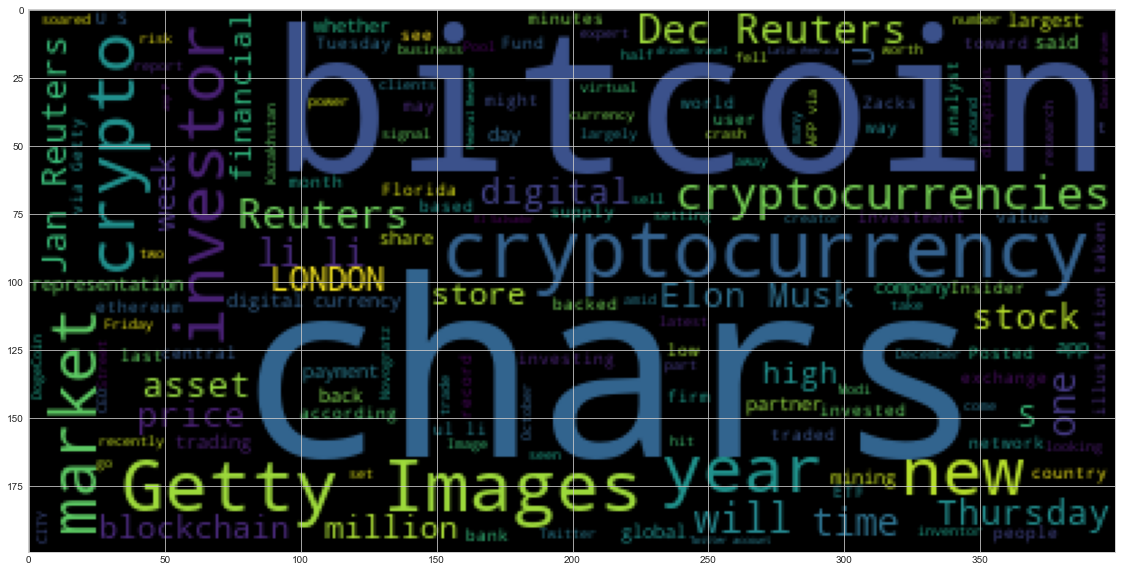

In [23]:
# Generate the Bitcoin word cloud
btc_cloud = ' '.join(btc_df['text'])
btc_wc = WordCloud().generate(btc_cloud)
plt.imshow(btc_wc)

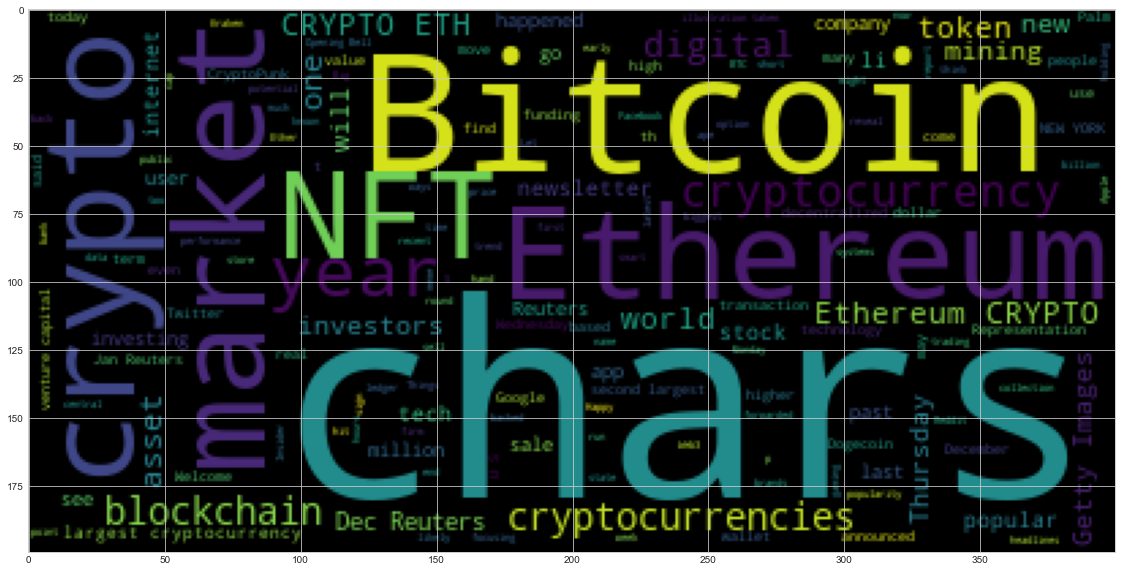

In [24]:
# Generate the Ethereum word cloud
eth_cloud = ' '.join(eth_df['text'])
eth_wc = WordCloud().generate(eth_cloud)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
btc_cloud

In [ ]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_cloud)

# Add a title to the document
btc_ner.user_data['title'] = 'Bitcoin NER'

In [ ]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [ ]:
# List all Entities
btc_ent_list = [btc_ner.ents]
btc_ent_list

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
eth_cloud

In [ ]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_cloud)

# Add a title to the document
eth_ner.user_data['title'] = 'Ethereum NER'

In [ ]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [ ]:
# List all Entities
eth_ner_list 

---